In [3]:
from HeaderP import *
import Astraea

/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:18: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:16: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, namedtuple, defaultdict, Sequence
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module 

In [4]:
galah_main=readfits('../Data/GALAH_DR3_main_allstar_v1.fits')
galah_ages=readfits('../Data/GALAH_DR3_VAC_ages_v1.fits')

In [5]:
galah=pd.merge(galah_main,galah_ages,left_on='sobject_id',right_on='sobject_id',how='inner')

# With TESS LG periods

In [18]:
TESSProt=pd.read_csv('/Users/lucy/Desktop/SecondYear_2/TESS_Prot/galahtess.csv')
TESSProt['LG_Prot']=[float(i.split('[')[1].split(']')[0]) for i in TESSProt['LG_Prot']]
TESSProt['LG_peak']=[float(i.split('[')[1].split(']')[0]) for i in TESSProt['LG_peak']]

In [24]:
tessgalah=pd.read_pickle('../Data/tess_galah.pkl')
tessgalah=pd.merge(tessgalah,TESSProt,left_on='TICID',right_on='TICs',how='inner')
tessgalah=pd.merge(tessgalah[['sobject_id','LG_Prot','Rvar','LG_peak']],galah,left_on='sobject_id',
                   right_on='sobject_id',how='inner')


In [31]:
galah_solar=tessgalah.loc[abs(tessgalah['fe_h'])<0.05]

In [32]:
galah_solar=galah_solar.reset_index()
print(np.shape(galah_solar))

(0, 15)

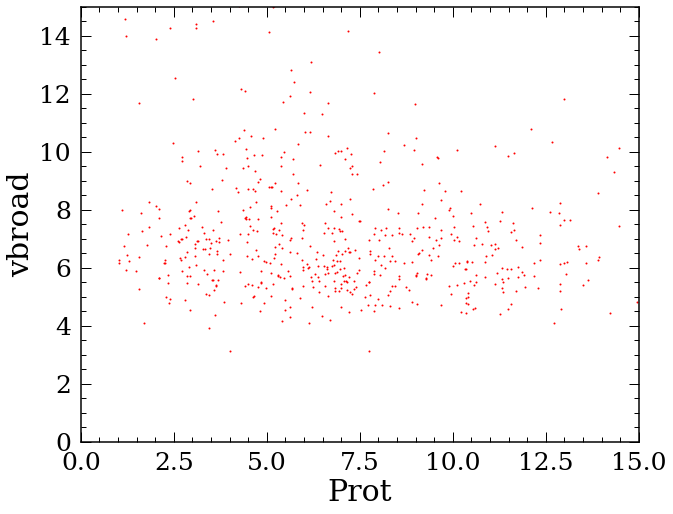

In [39]:
plt.figure(figsize=(10,8))
plt.scatter(galah_solar['LG_Prot'],galah_solar['vbroad'],s=1,c='r')
plt.xlabel('Prot')
plt.ylabel('vbroad')
plt.xlim([0,15])
plt.ylim([0,15])


# With vsini

In [28]:
galah_solar=galah.loc[abs(galah['fe_h'])<0.05]

In [29]:
galah_solar=galah_solar.reset_index()

Text(0, 0.5, '[α/Fe]')

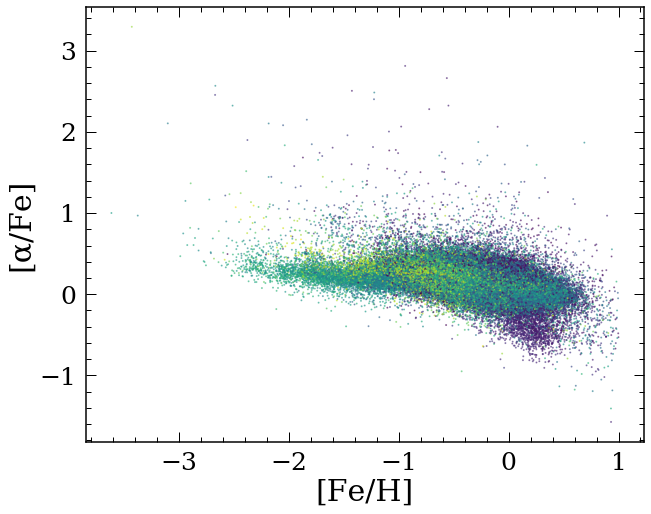

In [30]:
plt.figure(figsize=(10,8))
plt.scatter(galah['fe_h'],galah['alpha_fe'],c=galah['age_bstep'],s=1,alpha=0.5)
plt.xlabel('[Fe/H]')
plt.ylabel('[α/Fe]')

Text(0, 0.5, 'vbroad')

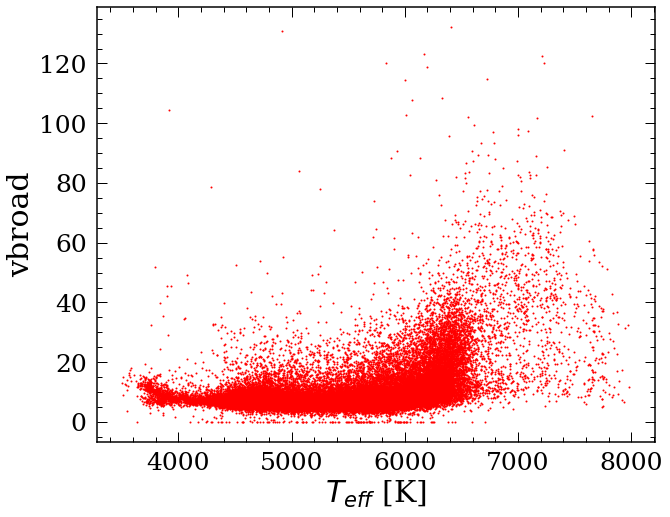

In [18]:
plt.figure(figsize=(10,8))
plt.scatter(galah_solar['teff'],galah_solar['vbroad'],s=1,c='r')
plt.xlabel('$T_{eff}$ [K]')
plt.ylabel('vbroad')